# Project Phase III: Anna Asch (aca89) and Anna Clemson (aac64)

__Note:__ For all of our analyses, we are planning to normalize any data points that we use so that they can be compared more easily. Additionally, we aim to to create a standard metric for each aspect that we are looking at (hitting, pitching, and fielding). Already in our dataset is wRC+, a hitting metric which incorporates a lot of offense-related information, and which has a mean of 100 for a given season. We will probably use this for offense, and transform it so that it has a standard normal distribution to better work with the rest of our data.

### First Preregistered Analysis

We are going to run a multiple regression analysis to model how hitting, pitching, and fielding contribute to winning percentage. In this case, our dependent variable will be winning percentage. Our explanatory variables will be metrics that incorporate all information that we deem relevant for pitching, hitting, and fielding, respectively. We will transform each of these variables into standard normals. 

For the hitting metric, we will use wRC+, but we will standardize it so its distribution has a mean of 1 and a standard deviation of 0. Next, we will normalize and standardize FIP to use as our pitching metric. Finally, we will use UZR for fielding, again standardized and normalized. Although this statistic is not designed in the same way as wRC+ and FIP, it evaluates a player's overall defensive value based on the runs they save. It captures defensive contributions based on theoretical runs saved compared to the "average" fielder.

The goal of this analysis is to determine how a linear relationship relates our three categories of interest to winning percentage. This will help us address the question of whether the most successful teams in the post-steroid era were built with elite hitting, pitching, or fielding. Since all of our predictor variables will be standardized, we can compare the effect that each of them have on winning percentage. We also plan to use this analysis to develop a way to predict winning percentage based on hitting, pitching, and fielding quality in the future. As such, we plan on splitting our data into a training set and a testing set for this regression, so that we do not overfit the model and so that we can predict theoretical winning percentages for the 2021 season. 

### Second Preregistered Analysis

We want to see if the effect of certain statistics on winning percentage changes over time. Generally, we are trying to determine if certain offensive contributions have become more or less important for winning since 2006 and if certain pitching contributions have become more or less important for winning. We know that we've seen home run numbers and other power numbers increase along with strikeouts. We want to see if these changes are changing how teams win games. Specifically, we are going to look at the relationship between home runs and winning percentage over time. In order to do this, we are planning on running a multivariable regression (__Need to figure out what type of regression per Daniel's email__) with each year as a discrete variable. In order to distinguish years, we have created dummy variables for each year. We will then isolate effects of home runs on winning percentage for each year within the regression. In order to determine if there is a change in coefficients on HR when we control for year within the model.

We believe it is fair to assume that each year is independent of the other. Although teams don't completely change every year, each season is a completely fresh start and last year has no bearing on the outcome of this season. We also haven't seen any major rule changes in the last 15 years, so we think that it is reasonable to compare the game across this time period. (Note: We will consider including an asterisk that there are some questions about the ball changing in the past few years. MLB largely denies this and conclusive evidence is hard to find with respect to this issue. As such, it seems reasonable to merely note these changes and not spend too much time dwelling on them as they are beyond the scope of this project.)

** This was before what Daniel emailed, and I think he said we can't do this **
We want to see if the effect of certain statistics on winning percentage changes over time. Specifically, we want to see if offense has become more or less important for winning since 2006 and if pitching has become more or less important for hitting. We know that we've seen home run numbers and other power numbers increase along with strikeouts. We want to see if these changes are related to a change in the game. So are HR more valuable today (from 2019 data) than they were in 2006? One analysis that we are going to run to determine this is to develop a regression model that illustrates the affect of home runs on winning percentage in 2006, and then in 2019. We are going to use hypothesis testing to see if these coefficients from our regression are statistically different. We are hoping to find a way to expand this model so that we can look at changes over time using all of the years in our dataset (2006-2019). This would entail creating a regression for, in this case, winning percentage on HR for each year. Then we would try to figure out if there is a discernable trend in the coefficients. Our theory is that those coefficients are increasing, which is to say HR are becoming more important for winning percentage.

### Second question

home runs (offense index) ~ win pct

does the slope change over time? 

simple linear regression


We are planning to normalize any of the number that we use, and potentially create a standard metric for each of the three aspects which we are considering. WRC+ is a normalized metric 

Is there a way to compare regression coefficients over time?

We want to compare a metric which measures the quality of the offense with the winning percentage, and see if the relationship between these changes over time. 

to see if the effect of the quality of the offense affects the winning percentage

If we have a standardized metric for the quality of the offense, which we want to 

identifying change in the importance of a variable

### First question

if pitching is x% above average, how much does win pct increase?
vs if hitting is x% above average, how much does win pct increase

test if coefficients are same

if we train/test split the data, we can predict for the future - predict 2021 teams win pct using offense / defense

multi linear regression

have to standard normalize stats (maybe use WRC+ for offense)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

baseball = pd.read_csv('baseball_data.csv')

In [16]:
linear_reg = LinearRegression().fit(baseball[['wrc_plus']], baseball['win_pct'])
linear_reg.score(baseball[['wrc_plus']], baseball['win_pct'])

0.4446185916114819

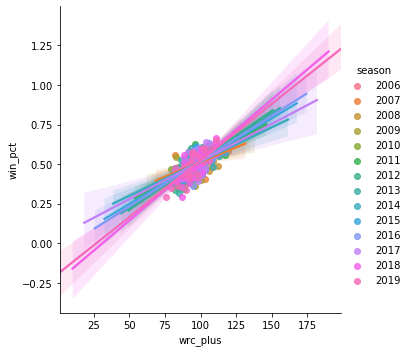

In [17]:
sns.lmplot(data=baseball, x='wrc_plus', y='win_pct', hue = 'season')
plt.show()

In [26]:
bball2019 = baseball[baseball.season == 2019]
lr2019 = LinearRegression().fit(bball2019[['wrc_plus']], bball2019['win_pct'])
print(lr2019.score(bball2019[['wrc_plus']], bball2019['win_pct']))
print(lr2019.coef_)

0.7103739737662745
[0.00715245]


In [27]:
bball2006 = baseball[baseball.season == 2006]
lr2006 = LinearRegression().fit(bball2006[['wrc_plus']], bball2006['win_pct'])
print(lr2006.score(bball2006[['wrc_plus']], bball2006['win_pct']))
print(lr2006.coef_)

0.43862123734613634
[0.00602046]


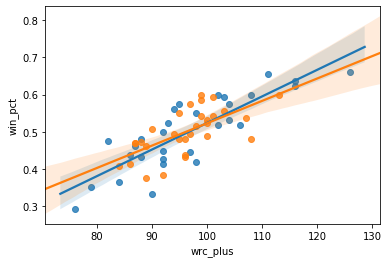

In [36]:
sns.regplot(data=bball2019, x='wrc_plus', y='win_pct')
sns.regplot(data=bball2006, x='wrc_plus', y='win_pct')
plt.show()

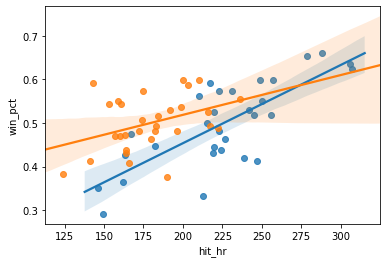

In [37]:
sns.regplot(data=bball2019, x='hit_hr', y='win_pct')
sns.regplot(data=bball2006, x='hit_hr', y='win_pct')
plt.show()

Above, we see that the slope of winning percentage vs. WRC+ is about the same in 2019 as in 2006 (not statistically significant). We also see that the slope of winning percentage vs number of home runs hit is statistically significant.

In [50]:
multi_reg = LinearRegression().fit(bball2019[['wrc_plus', 'fip']], bball2019['win_pct'])
multi_reg.coef_
print(multi_reg.score(baseball[['wrc_plus', 'fip']], baseball['win_pct']))

0.4280878982505967
